# Loan Approval Prediction

After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic Regression (0.7747), followed by RandomForest (0.786) while Decision Tree performed the worst (0.65), and talking about the Naive Bayes classifier it performed (0.78). 

This project covers the whole process from problem statement to model development and evaluation:

1. Exploratory Data Analysis (EDA)
2. Data Pre-processing
3. Model Development and Evaluation
4. Conclusion


***
# Exploratory Data Analysis (EDA)
We will use Python to explore the data in order to gain a better understanding of the features and target variable. We will also analyze the data to summarize their main characteristics, using various visualization techniques. 

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets
data=train
train_original = train.copy()
test_original = test.copy()

In [4]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((614, 13), (367, 12))

In [7]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [8]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Here's a brief definition for each column in the dataset:

1. `Loan_ID`: A unique identifier for each loan application.
2. `Gender`: Gender of the applicant (Male/Female).
3. `Married`: Marital status of the applicant (Yes/No).
4. `Dependents`: Number of dependents of the applicant.
5. `Education`: Education level of the applicant (Graduate/Not Graduate).
6. `Self_Employed`: Whether the applicant is self-employed or not (Yes/No).
7. `ApplicantIncome`: Income of the applicant.
8. `CoapplicantIncome`: Income of the co-applicant (if any).
9. `LoanAmount`: Amount of the loan applied for.
10. `Loan_Amount_Term`: Term of the loan in months.
11. `Credit_History`: Credit history of the applicant (1: Good, 0: Bad).
12. `Property_Area`: Area where the property associated with the loan is located (Urban/Semiurban/Rural).
13. `Loan_Status`: The status of the loan application (Approved/Rejected).

In [9]:
# show the data types for each column of the train set
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Univariate analysis
Univariate analysis is when we analyze each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution. Note that a histogram can’t show you if you have any outliers. This is why we also use box-plots.

### Target Variable (Categorical)
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [12]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Status')

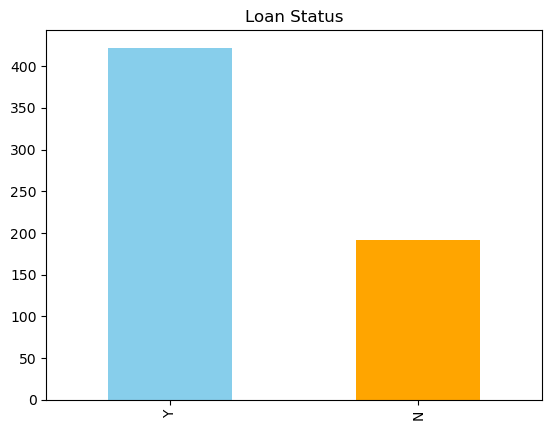

In [14]:
# bar plot to visualize the frequency
colors = ['skyblue', 'orange']
train['Loan_Status'].value_counts().plot.bar(color=colors)
plt.title("Loan Status")

### Independent Variable (Categorical)
There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

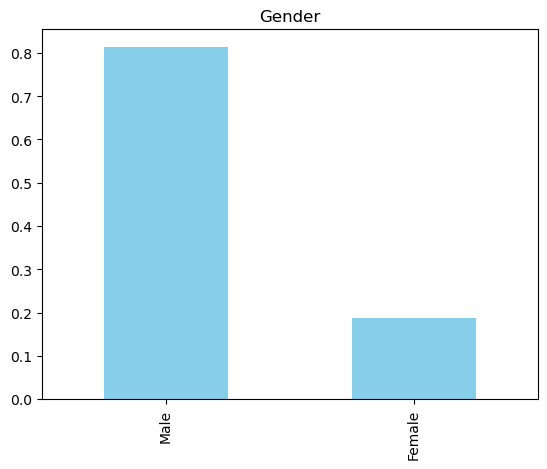

In [15]:
# Plotting 'Gender'
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender', color='skyblue')
plt.show()


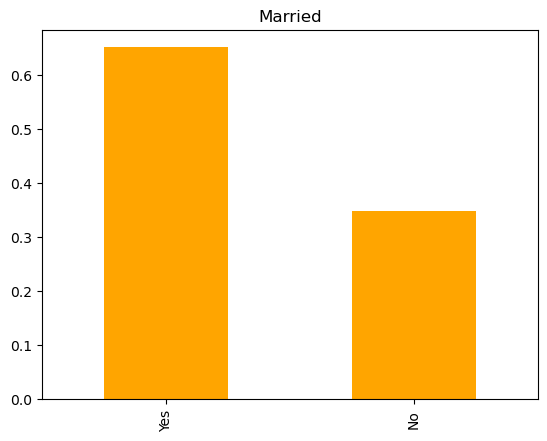

In [16]:
# Plotting 'Married'
train['Married'].value_counts(normalize=True).plot.bar(title='Married', color='orange')
plt.show()

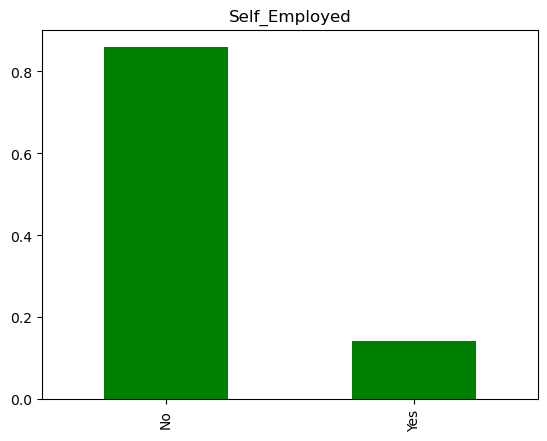

In [17]:
# Plotting 'Self_Employed'
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color='green')
plt.show()

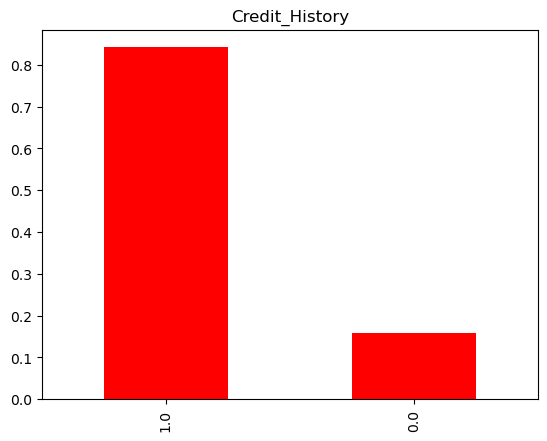

In [18]:
# Plotting 'Credit_History'
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color='red')
plt.show()

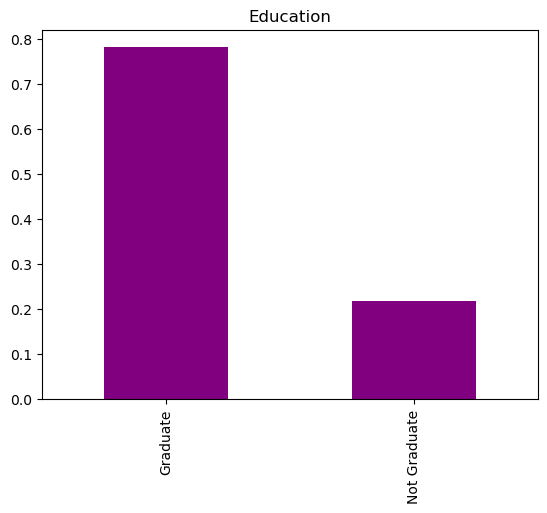

In [19]:
# Plotting 'Education'
train['Education'].value_counts(normalize=True).plot.bar(title='Education', color='purple')
plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have credit history (repaid their debts).
- Around 80% of the applicants are Graduate.


### Independent Variable (Ordinal)
There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

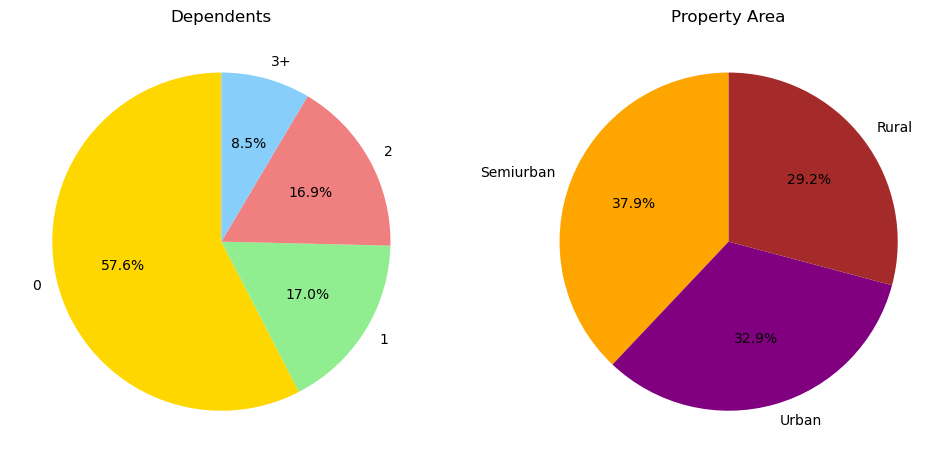

In [20]:
# Visualizing remaining categorical features
plt.figure(figsize=(12, 6))

# Plotting 'Dependents' as a pie chart
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Dependents')
plt.ylabel('')  # Remove the y-label as it's not needed for pie charts

# Plotting 'Property_Area' as a pie chart
plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90, colors=['orange', 'purple', 'brown'])
plt.title('Property Area')
plt.ylabel('')

# Display the plots
plt.show()

Following inferences can be made from the above bar plots:

- More than half of the applicants don’t have any dependents.
- Most of the applicants are from Semiurban area.


### Independent Variable (Numerical)
There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution:

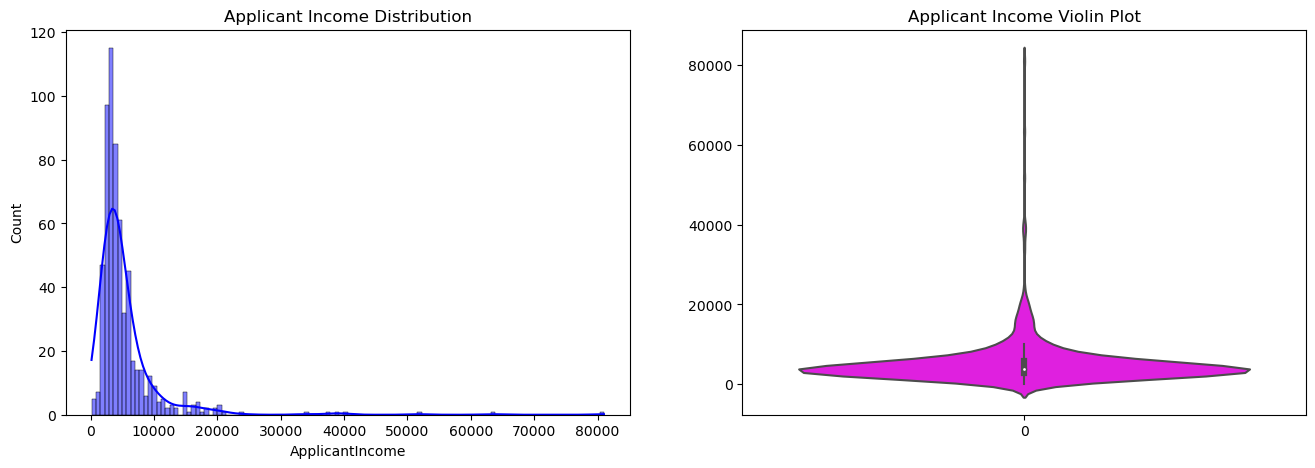

In [21]:
plt.figure(figsize=(16, 5))

# Plotting 'ApplicantIncome' using a histogram and KDE (Kernel Density Estimate)
plt.subplot(121)
sns.histplot(train['ApplicantIncome'], kde=True, color='blue')
plt.title('Applicant Income Distribution')

# Plotting 'ApplicantIncome' using a violin plot
plt.subplot(122)
sns.violinplot(train['ApplicantIncome'], color='magenta')
plt.title('Applicant Income Violin Plot')

# Display the plots
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

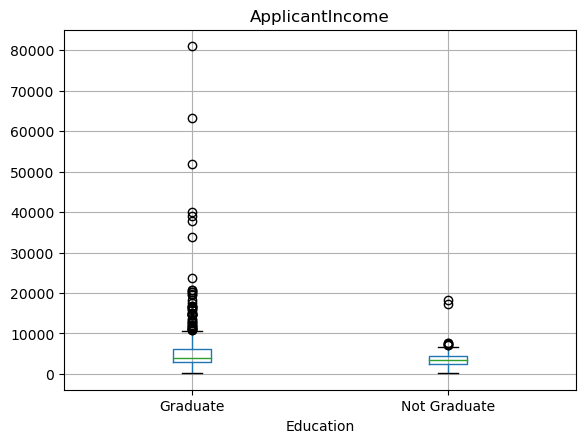

In [22]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Secondly, Let’s look at the Coapplicant income distribution.

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed. Thirdly, let’s look at the distribution of LoanAmount variable.

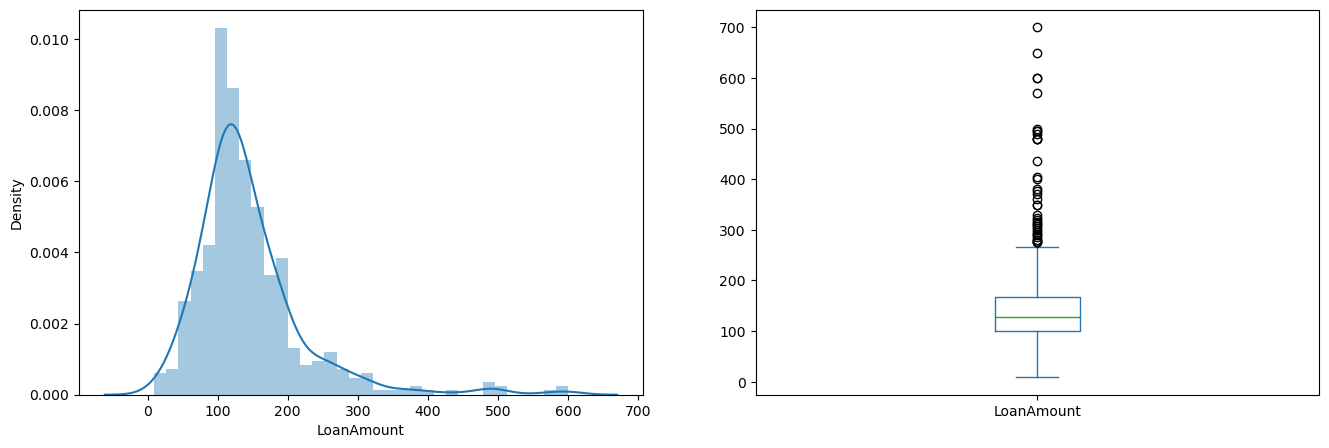

In [23]:
# plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections. Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [24]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

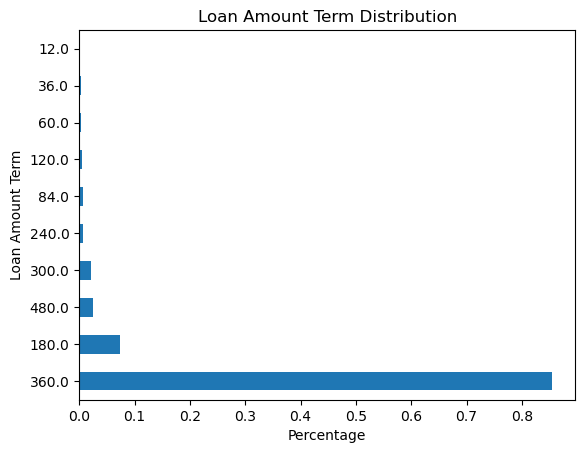

In [25]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.barh(title='Loan Amount Term Distribution')
plt.xlabel('Percentage')
plt.ylabel('Loan Amount Term')
plt.show()

It can be inferred from the above bar plot that:

- Around 85% of the loans are 360 months term or 30 years period


Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

## Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.



**Categorical Independent Variable vs Target Variable**

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


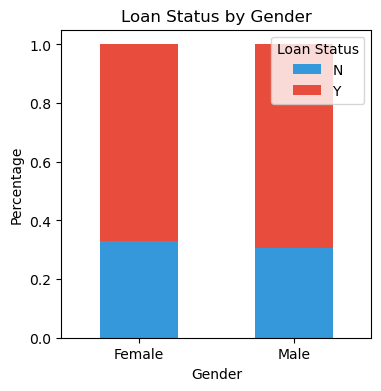

In [26]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4), color=['#3498db', '#e74c3c'])
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Loan Status by Gender')
plt.xticks(rotation=0)  # Rotate labels to horizontal
plt.legend(title='Loan Status', loc='upper right')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


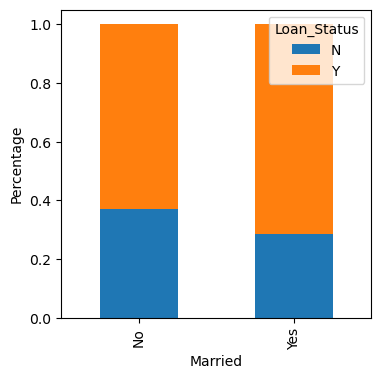

In [27]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


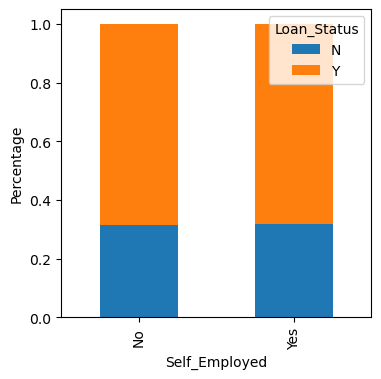

In [28]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

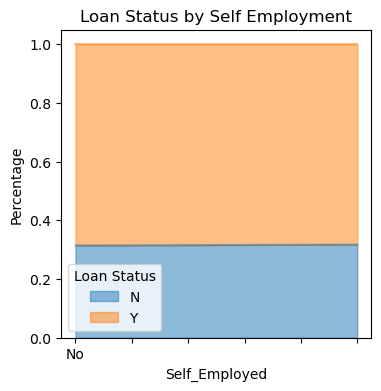

In [29]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

# Normalize the crosstab to get percentages
Self_Employed_percentage = Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0)

# Create a stacked area plot
Self_Employed_percentage.plot(kind='area', stacked=True, figsize=(4,4), alpha=0.5)

# Adding labels and title
plt.xlabel('Self_Employed')
plt.ylabel('Percentage')
plt.title('Loan Status by Self Employment')
plt.xticks(rotation=0)  # Set the x-ticks to be horizontal
plt.legend(title='Loan Status')

# Show the plot
plt.show()

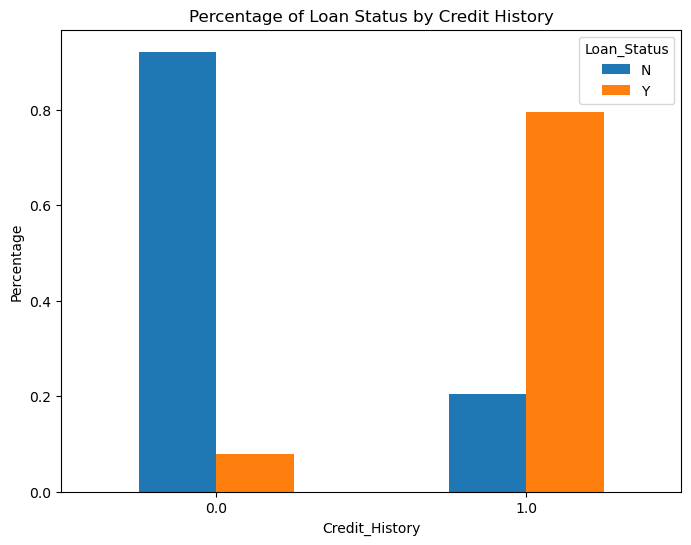

In [30]:
# Create a cross-tabulation of Credit_History and Loan_Status
credit_history_cross_tab = pd.crosstab(train['Credit_History'], train['Loan_Status'])

# Calculate the percentage of each category in Credit_History
credit_history_percentage = credit_history_cross_tab.div(credit_history_cross_tab.sum(1).astype(float), axis=0)

# Plot a grouped bar chart
credit_history_percentage.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Credit_History')
plt.ylabel('Percentage')
plt.title('Percentage of Loan Status by Credit History')
plt.xticks(rotation=0)
plt.legend(title='Loan_Status')
plt.show()


Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


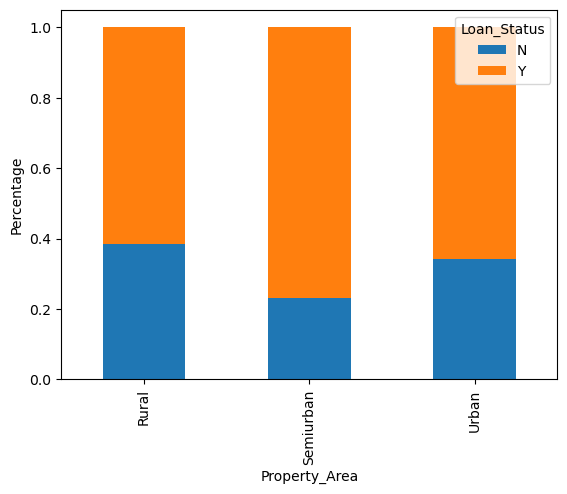

In [31]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

From the bar charts above, it can be inferred that:
- proportion of male and female applicants is more or less same for both approved and unapproved loans
- proportion of married applicants is higher for the approved loans
- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
- there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- proportion of loans getting approved for graduates is higher compared to non-graduates
- it seems people with credit history as 1 are more likely to get their loans approved
- proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

**Numerical Independent Variable vs Target Variable**<br>

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

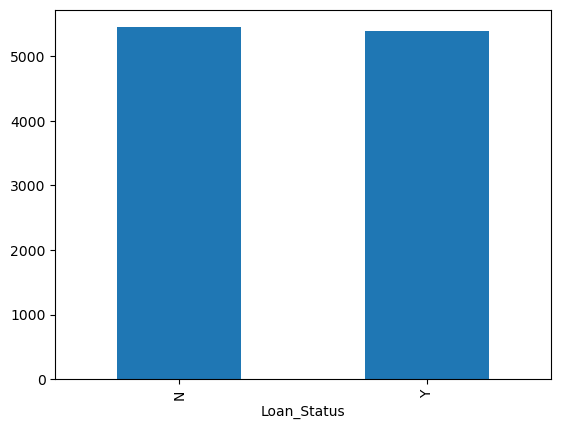

In [32]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicant (5384 vs 5446). 

So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [33]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [34]:
# take a look at the train set
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


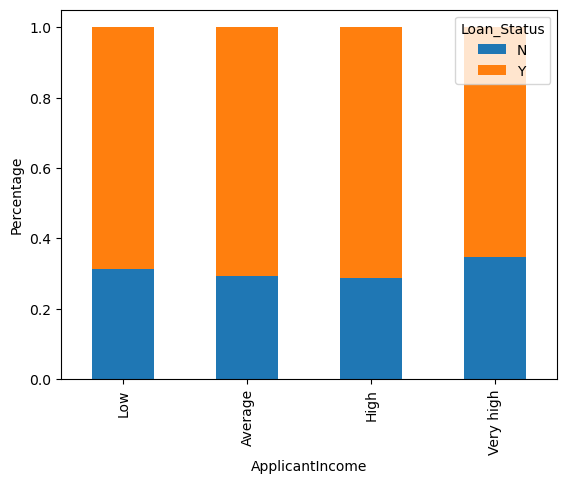

In [35]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the Coapplicant income and loan amount variable in similar manner.

In [36]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

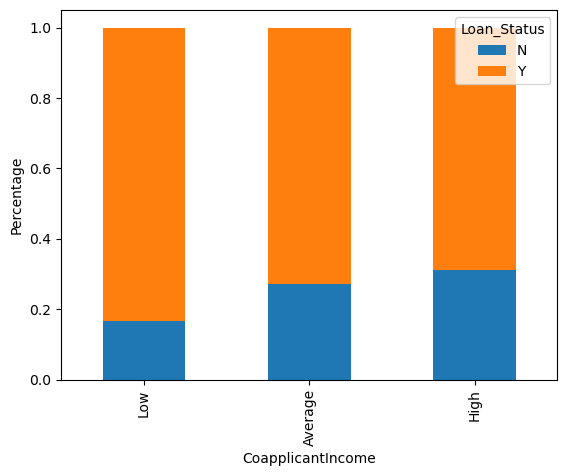

In [37]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [38]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [39]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [40]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

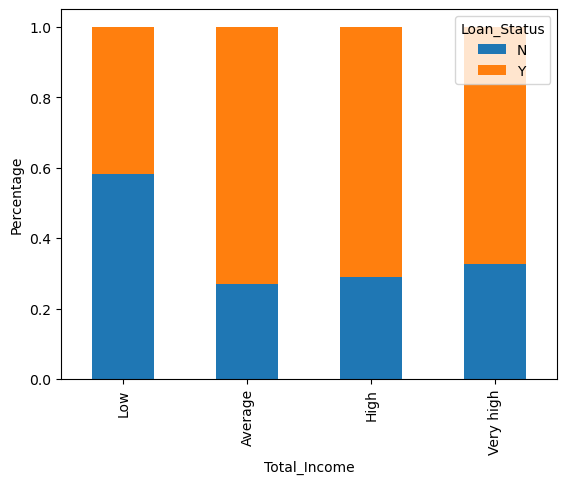

In [41]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. This is more consistent with our hypothesis with applicants with high income  will have more chances of loan approval.

Let’s visualize the Loan amount variable.

In [42]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

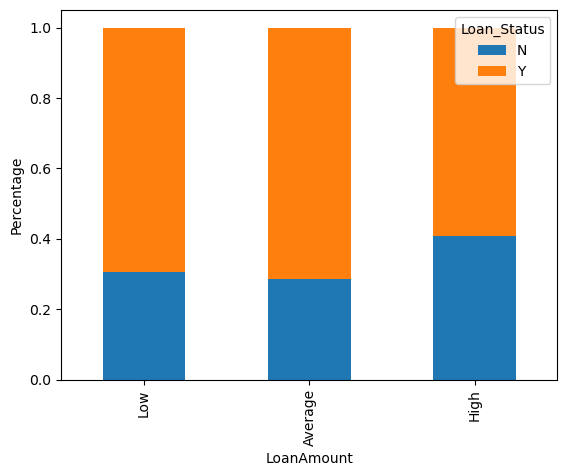

In [43]:
# plot the chart 
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less. 

Let’s drop the bins which we created for the exploration part. 

In [44]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [45]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [46]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [47]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [48]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [49]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now lets look at the correlation between all the numerical variables. We can use the `corr()` to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


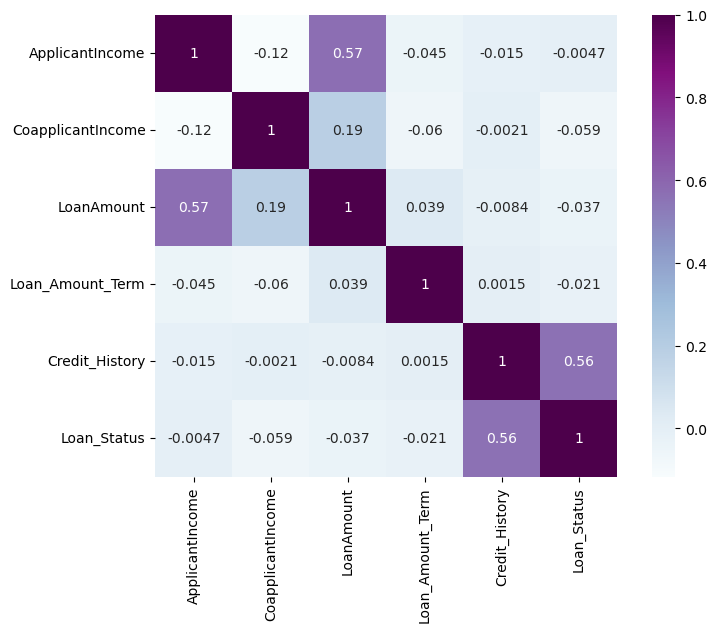

In [50]:
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

***
# <a name="pre">Data Pre-processing</a>

Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data pre-processing is a method of resolving such issues.

## Missing value and outlier treatment
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

### Missing value imputation

Let’s list out feature-wise count of missing values.

In [51]:
# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [52]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [53]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [54]:
# replace missing value with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [55]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [56]:
# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach. 

#### *Note* : We need to replace the missing values in Test set using the mode/median/mean of the Training set, not from the Test set. Likewise, if you remove values above some threshold in the test case, make sure that the threshold is derived from the training and not test set. Make sure to calculate the mean (or any other metrics) only on the train data to avoid data leakage to your test set.

In [57]:
# replace missing values in Test set with mode/median from Training set
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [58]:
# check whether all the missing values are filled in the Test dataset
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

As we can see that all the missing values have been filled in the Test dataset.


## Removing The Outliers Performing IQR MEthod

In [59]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Identify and filter out outliers from the dataset
train_filtered = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

# Now, 'train_filtered' will have the DataFrame without outliers
print(train_filtered)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
607  LP002964    Male     Yes          2  Not Graduate            No   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0           

***
# <a name="model">Model Development and Evaluation</a>



***
## <a name="evaluation">Evaluation Metrics for Classification Problems</a>


The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

**Accuracy**: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is how a confusion matrix looks like:


**Precision**: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.


**Recall (Sensitivity)** - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. E.g. Proportion of patients with a disease who test positive.


**Specificity** - It is a measure of how many observations of false class are labeled correctly. E.g. Proportion of patients without the disease who test negative.


Specificity and Sensitivity plays a crucial role in deriving ROC curve.

**ROC curve**

- Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (Sensitivity) and false positive rate (1- Specificity).

- The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

- The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.

- So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.

- We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.

- For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.

- The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.



***
## <a name="model1">Model Building</a>

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.


- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
- Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
- This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function
- Navie baye's is also a good classifier technique.


In [60]:
# drop Loan_ID 
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [61]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [62]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [63]:
# import library
from sklearn.model_selection import train_test_split

In [64]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 20), (185, 20), (429,), (185,))

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [66]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [68]:
# make prediction
pred_cv = model.predict(x_cv)

In [69]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.8324324324324325

So our predictions are over 83% accurate, i.e. we have identified 83% of the loan status correctly.

Let’s evaluate our model with the confusion matrix.

In [72]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.8032786885245902

Mean validation accuracy:  0.8110622417699587


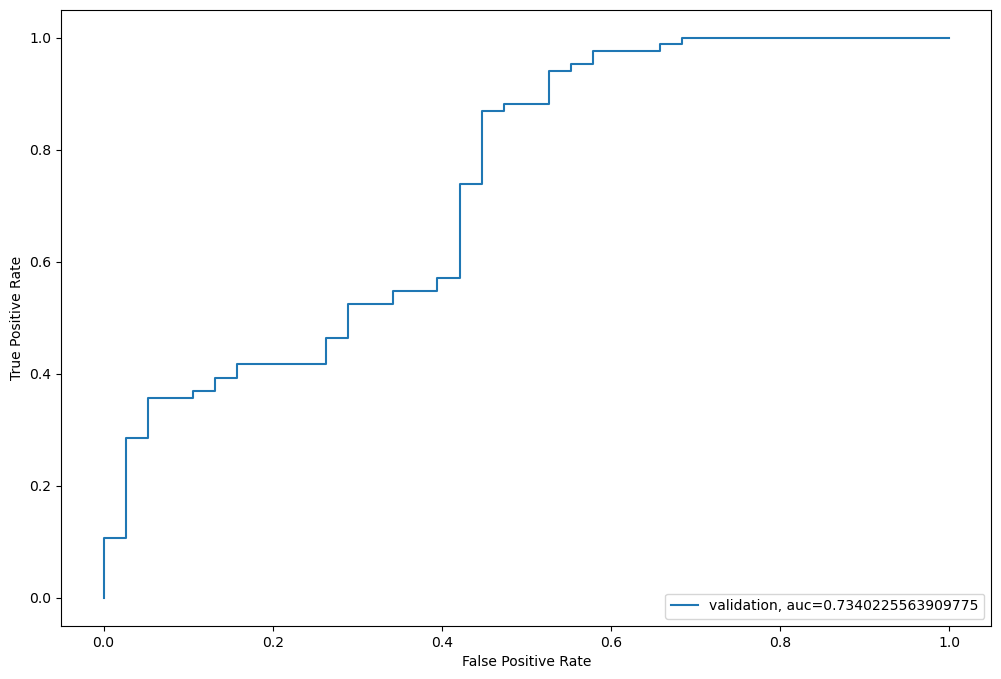

In [73]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

[[ 22  29]
 [  2 132]]


Text(50.722222222222214, 0.5, 'True')

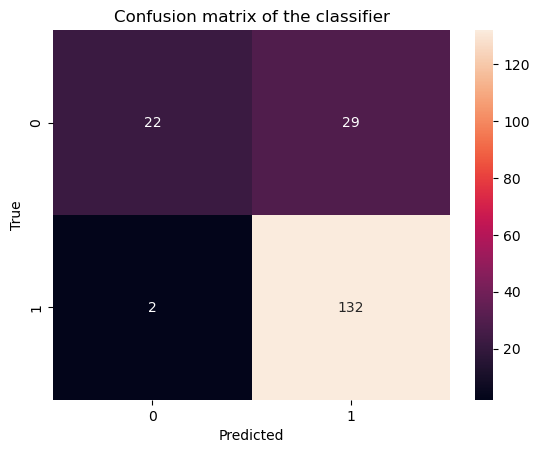

In [74]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Let's build a text report showing the main classification metrics.

In [75]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



The performance of our model seems encouraging, with accuracy of 83%, precision of 82% and recall of 99%.

Let’s make predictions for the test dataset and submit the result.

In [76]:
# make prediction on test set
pred_test = model.predict(test)

In [77]:
# take a look at the prediction
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

## Logistic Regression using stratified k-folds cross validation

Cross-validation is a crucial technique used to assess the performance and generalization ability of machine learning models. It involves splitting the dataset into multiple subsets, or folds, to train and evaluate the model multiple times. Here are some common methods for cross-validation:

**Stratified k-Fold Cross Validation**: This method ensures that each fold contains approximately the same proportion of classes as the original dataset. It is particularly useful for imbalanced datasets where one class is much more prevalent than the others.

Stratification helps to mitigate the risk of bias in the model evaluation process by ensuring that each fold is a representative sample of the entire dataset. It is especially important in cases of class imbalance, where randomly selected folds might not adequately capture the characteristics of the minority class.

When K equals the total number of observations (K=N), it is called Leave One Out Cross Validation (LOOCV), where each observation serves as a validation set. This method provides an unbiased estimate of the model's performance but can be computationally expensive for large datasets.

Overall, cross-validation techniques help to provide a more reliable estimate of a model's performance and its ability to generalize to unseen data.


In [78]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

The mean validation accuracy for this model turns out to be 0.81. Let us visualize the ROC curve.

In [79]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=2)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.8032786885245902

Mean validation accuracy:  0.8110622417699587


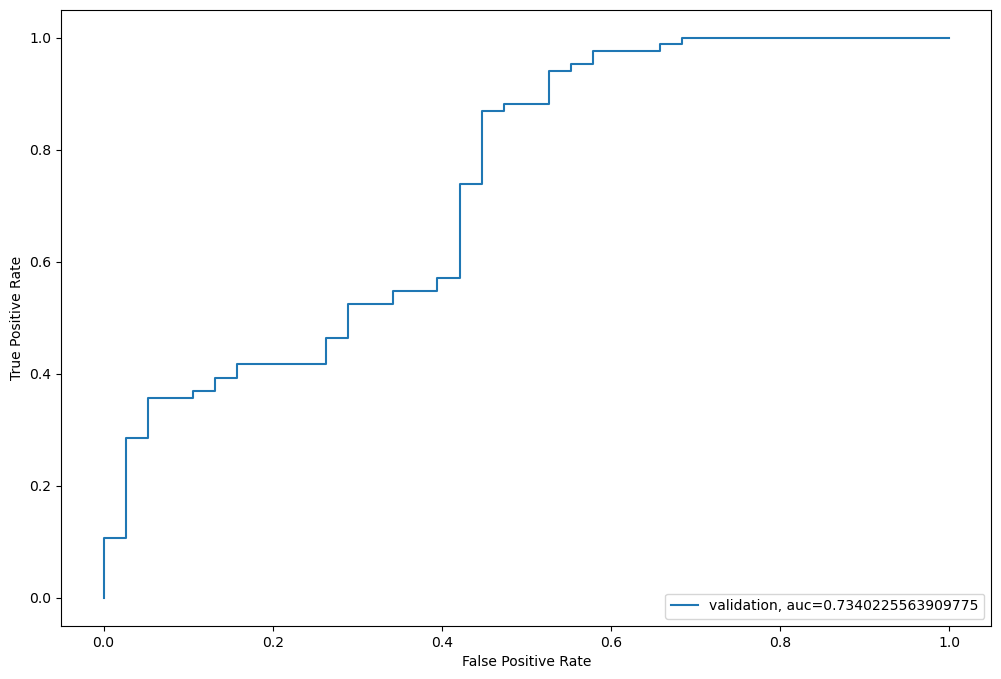

In [80]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The Efficiency of the Logistict regression before feature engineering is 84.5%

***
## <a name="feature">Feature Engineering</a>

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

- **Total Income** - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
- **Equated Monthly Installment** - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
- **Balance Income** - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [81]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

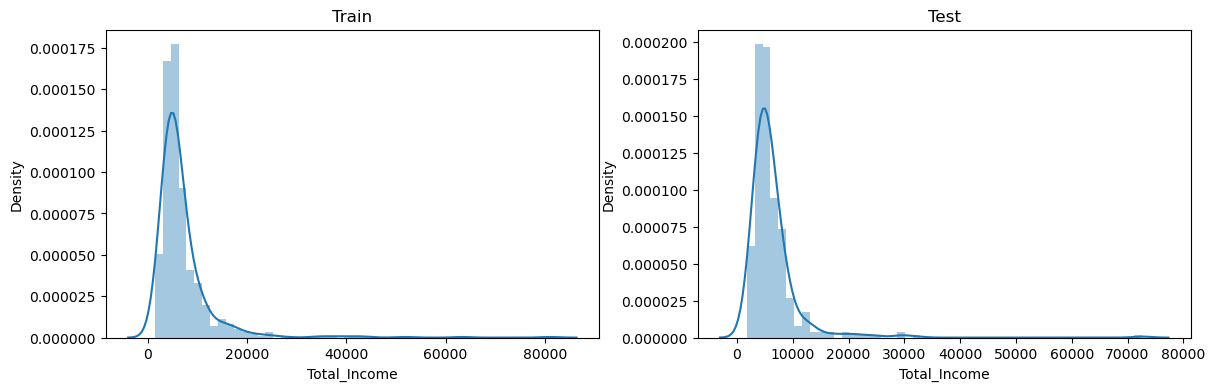

In [82]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

In [83]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

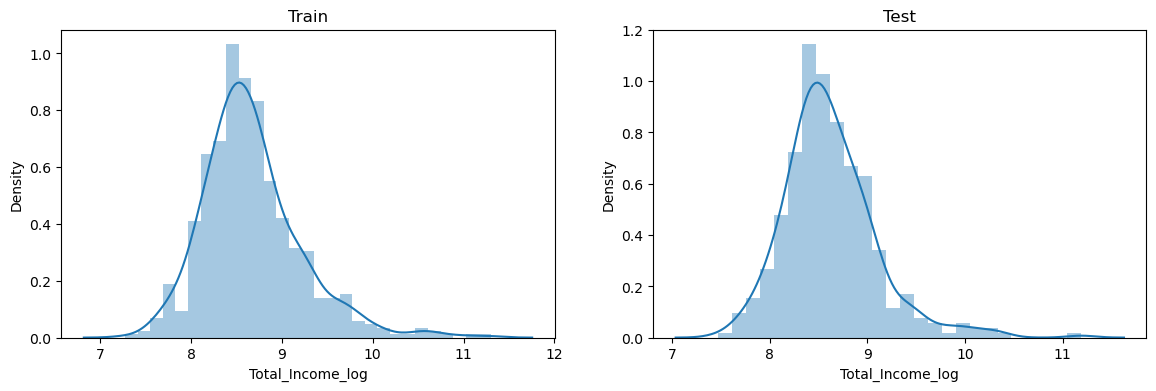

In [84]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. It is just an approximation of actual EMI.

In [85]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

Let’s check the distribution of EMI variable. EMI is a continuous numerical variable.

Text(0.5, 1.0, 'Test')

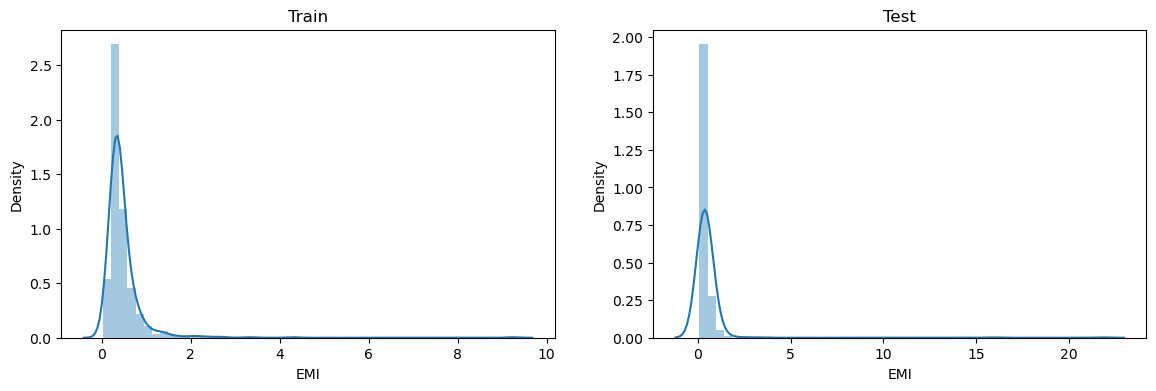

In [86]:
# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

In [87]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

Text(0.5, 1.0, 'Test')

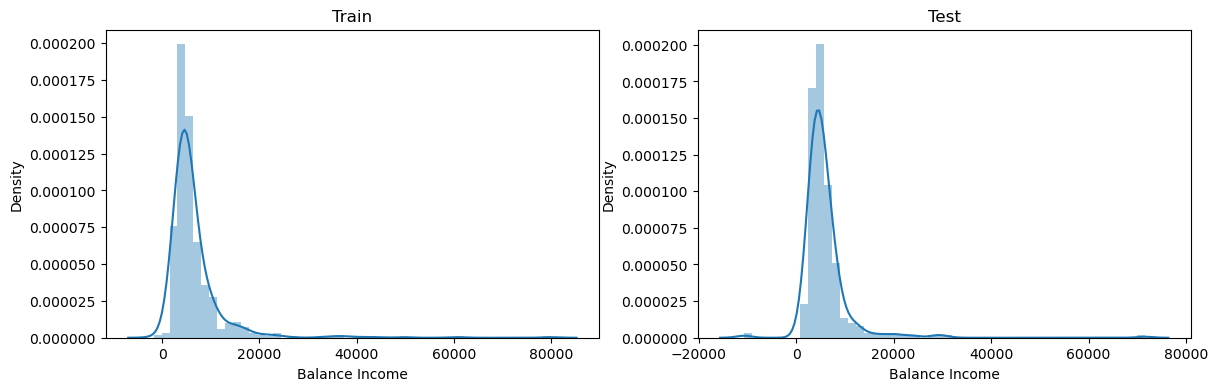

In [88]:
# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too. We will drop "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" as they are already represented by "Total Income", "EMI" and "Balance Income".

In [89]:
# before dropping variables
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [90]:
# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [91]:
# after dropping variables
train.head()

,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,0,1,0,1,0,1,0,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


***
## <a name="model2">Model Building</a>


After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest.

We will build the following models in this section.


- Logistic Regression
- KNN algorithm
- Decision Tree
- Random Forest
- Naive Bayes classifier


Let’s prepare the data for feeding into the models.

In [92]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset

In [93]:
from imblearn.over_sampling import SMOTE 
X, y = SMOTE().fit_resample(X, y)

### Logistic Regression

In [94]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=2)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8520710059171598

2 of kfold 5
accuracy_score 0.8284023668639053

3 of kfold 5
accuracy_score 0.8520710059171598

4 of kfold 5
accuracy_score 0.8461538461538461

5 of kfold 5
accuracy_score 0.7916666666666666

Mean validation accuracy:  0.8340729783037476


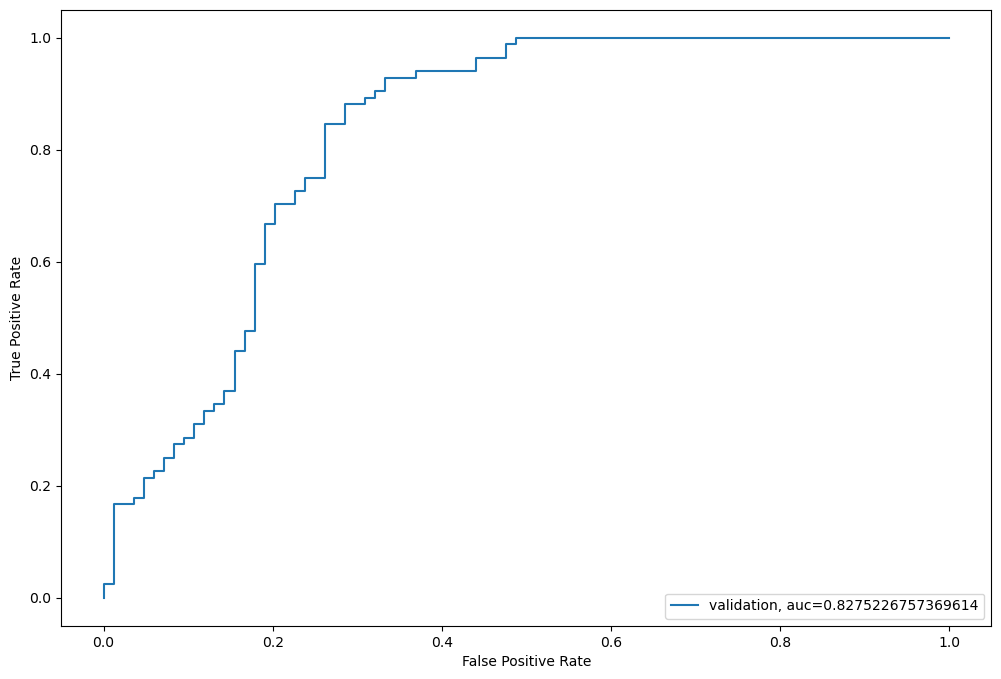

In [95]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The Accuracy of the above Logistict Regression is 83.29 %

# K-Nearest Neighbors (KNN) Algorithm

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer



# Scaling features - Important for distance calculation in KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Initialize the KNN model, setting the number of neighbors
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 75.74%


<Figure size 640x480 with 0 Axes>

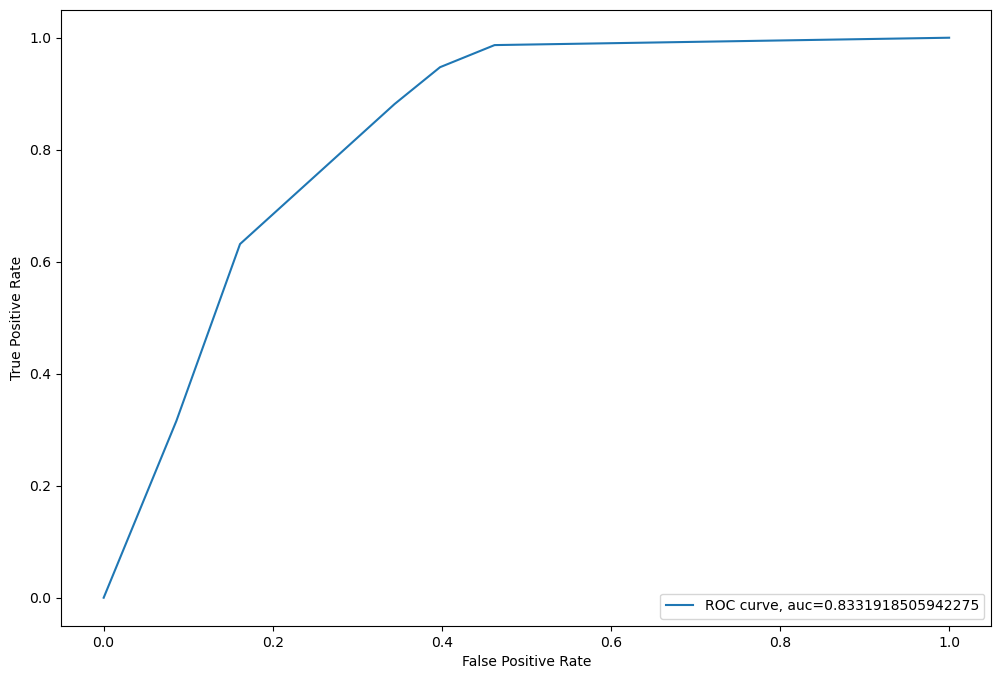

In [97]:
from sklearn.metrics import accuracy_score, roc_curve, auc
y_probs = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class

# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="ROC curve, auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

plt.show()

The mean validation accuracy for this model is 0.78

From this submission we got an accuracy of 0.78 on the leaderboard. So we can infer feature engineering has not improved the model. Let us look at some other algorithms.

### Decision Tree

Decision tree is a powerful supervised learning algorithm commonly used for classification tasks. It works by recursively partitioning the dataset into subsets based on the most significant feature at each step, resulting in a tree-like structure where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the predicted class label.

The algorithm selects the feature that best separates the data into homogeneous subsets, maximizing the purity or homogeneity of the subsets with respect to the target variable. This process continues recursively until a stopping criterion is met, such as reaching a maximum depth, achieving a minimum number of samples per leaf node, or no further improvement in purity is possible.

Decision trees use various algorithms, such as Gini impurity or entropy, to determine the best split at each node. These algorithms measure the impurity or disorder of the subsets and aim to minimize it by selecting the optimal split.

The resulting decision tree provides a clear and interpretable representation of the decision-making process, making it easy to understand and explain to stakeholders. Additionally, decision trees can handle both numerical and categorical features, making them versatile for a wide range of datasets and applications.

Overall, decision trees are effective for classification tasks, offering simplicity, interpretability, and the ability to capture non-linear relationships in the data.

In [98]:
# import library
from sklearn import tree

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.70%


The mean validation accuracy for this model is 81.66 %, which is lower than Logistic Regression, let's see how it perform on the Test set by submitting to the result.

We got an accuracy of 81.66 % which is much lesser than the accuracy from logistic regression model. So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

### Random Forest

- RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
- For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
- Final prediction can be a function of all the predictions made by the individual learners.
- In case of regression problem, the final prediction can be mean of all the predictions.

There are some parameters worth exploring with the sklearn RandomForestClassifier:

- n_estimators
- max_features

n_estimators = ususally bigger the forest the better, there is small chance of overfitting here. The more estimators you give it, the better it will do. We will use the default value of 10.

max depth of each tree (default none, leading to full tree) - reduction of the maximum depth helps fighting with overfitting. We will limit at 10.


In [100]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [101]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8284023668639053

2 of kfold 5
accuracy_score 0.8224852071005917

3 of kfold 5
accuracy_score 0.8461538461538461

4 of kfold 5
accuracy_score 0.8047337278106509

5 of kfold 5
accuracy_score 0.8095238095238095

Mean validation accuracy:  0.8222597914905607


The mean validation accuracy for this model is 0.8021

# Naive Bayes classifier

Naive Bayes is a family of probabilistic classifiers based on Bayes' theorem with the "naive" assumption of independence between features. It is a simple yet effective classification algorithm that is widely used in various machine learning tasks, especially for text classification and spam filtering.

**Types of Naive Bayes Classifiers**:
   There are different variants of Naive Bayes classifiers, including:
   - **Gaussian Naive Bayes**: Assumes that continuous features follow a Gaussian distribution.
   - **Multinomial Naive Bayes**: Suitable for discrete features (e.g., word counts for text classification).
   - **Bernoulli Naive Bayes**: Suitable for binary features (e.g., presence or absence of a feature).

Despite its simplicity and certain limitations, Naive Bayes classifiers are widely used in practice due to their effectiveness and efficiency, particularly in tasks involving text data and when the independence assumption holds reasonably well.

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [104]:
# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

In [105]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        93
           1       0.75      0.91      0.82        76

    accuracy                           0.82       169
   macro avg       0.83      0.83      0.82       169
weighted avg       0.84      0.82      0.82       169



The mean validation accuracy for this model is 82 %

### Feature Importance

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so. It will return the feature importances (the higher, the more important the feature).

<AxesSubplot:>

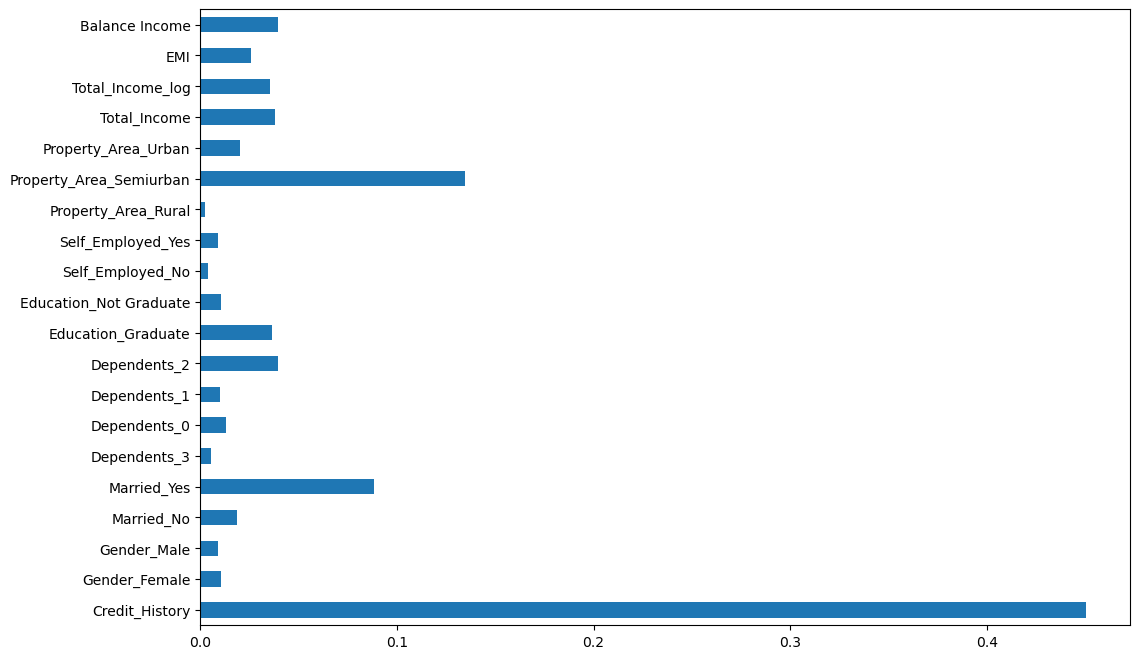

In [106]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Total Income Log, Total Income, Balance Income, Property Area Suburban, EMI. So, feature engineering helped us in predicting our target variable.

# **Conclusion**

After evaluating the performance of four different algorithms, logistic regression emerged as the top performer, achieving an accuracy of 0.8324 on the public leaderboard. Following closely was the RandomForest algorithm with an accuracy of 0.813,Naive Bayes the accuracy is 0.78, while Decision Tree exhibited the lowest performance with an accuracy of 0.684.

Logistic regression demonstrated its effectiveness despite its simplicity, requiring minimal feature engineering. Its straightforward implementation makes it an excellent choice as a baseline model for comparison against more complex algorithms. Interestingly, logistic regression outperformed more sophisticated techniques like Random Forest and navie bayes, showcasing its efficacy for this specific dataset.